# Decission Tree (Tugas 6)

Link For Play This Code : 

https://colab.research.google.com/drive/1aIzy_n2OqYjok6CaBtLv6pfpB9Qgp2IL

1.   Baca data bunga *iris*
2.   Implementasi algoritma Decission Tree 

## Baca Data 


*   Baca data dengan *library pandas* *italicized text*
*   Data [Bunga Iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [4]:
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [5]:
df = pd.read_csv(dataset_url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [7]:
# Missing Value in Variabel

df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
# Declare feature vector and target variable
X = df.drop(['variety'], axis=1)

y = df['variety']

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((100, 4), (50, 4))

In [11]:
# check data types in X_train

X_train.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
dtype: object

In [12]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 726 kB/s 


In [14]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=["sepal.length",	"sepal.width",	"petal.length",	"petal.width"])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
96,1,1,1,1
105,2,2,2,2
66,3,2,3,3
0,4,3,4,4
122,5,4,5,5


In [16]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
73,21.0,4.0,31.0,11
18,1.0,7.0,12.0,7
118,5.0,18.0,-1.0,14
78,14.0,1.0,3.0,3
76,25.0,4.0,16.0,20


In [17]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [18]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
y_pred_gini = clf_gini.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6600


In [21]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Setosa',
       'Versicolor', 'Versicolor

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7300


In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7300
Test set score: 0.6600


[Text(0.5416666666666666, 0.875, 'X[2] <= 13.5\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 3.5\ngini = 0.552\nsamples = 47\nvalue = [28, 13, 6]'),
 Text(0.16666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.18\nsamples = 10\nvalue = [0, 9, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.5, 0.375, 'X[3] <= 4.5\ngini = 0.397\nsamples = 37\nvalue = [28, 4, 5]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.609\nsamples = 19\nvalue = [10, 4, 5]'),
 Text(0.75, 0.625, 'X[3] <= 1.5\ngini = 0.545\nsamples = 53\nvalue = [3, 22, 28]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.8333333333333334, 0.375, 'X[1] <= 9.5\ngini = 0.519\nsamples = 46\nvalue = [3, 15, 28]'),
 Text(0.75, 0.125, 'gini = 0.401\nsamples = 27

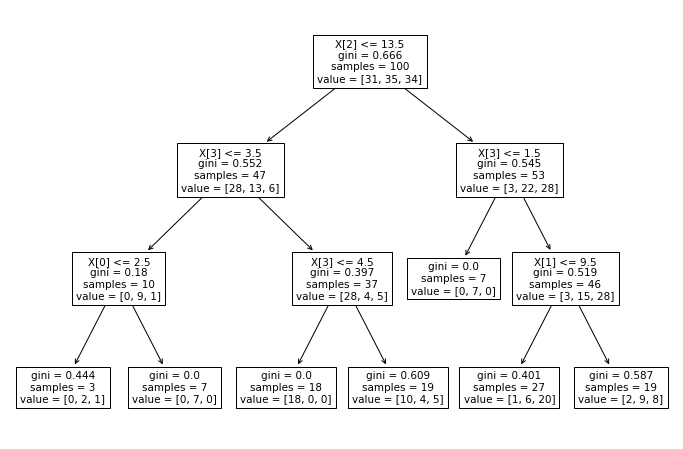

In [24]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

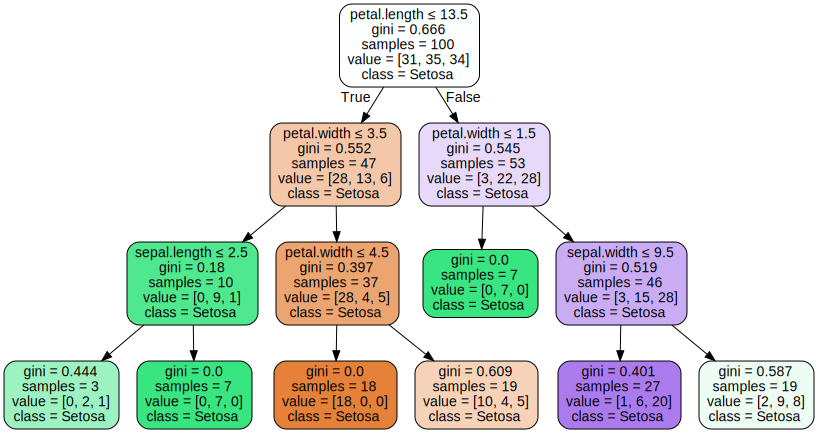

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 